This Jupyter notebook loads a set of data that represents patients' genetic traits and whether they have Ovarian Cancer or not. 

The data is plotted and is compared with the computed SVD.

The Singular Values and the Cumulative Sum are plotted too.

Then the data is projected on the principal components.

Size of Matrix obs: (216, 4000)
Size of Matrix grp: 216
Size of Matrix U: (216, 216)
Size of Matrix S: (216,)
Size of Matrix VT: (216, 4000)


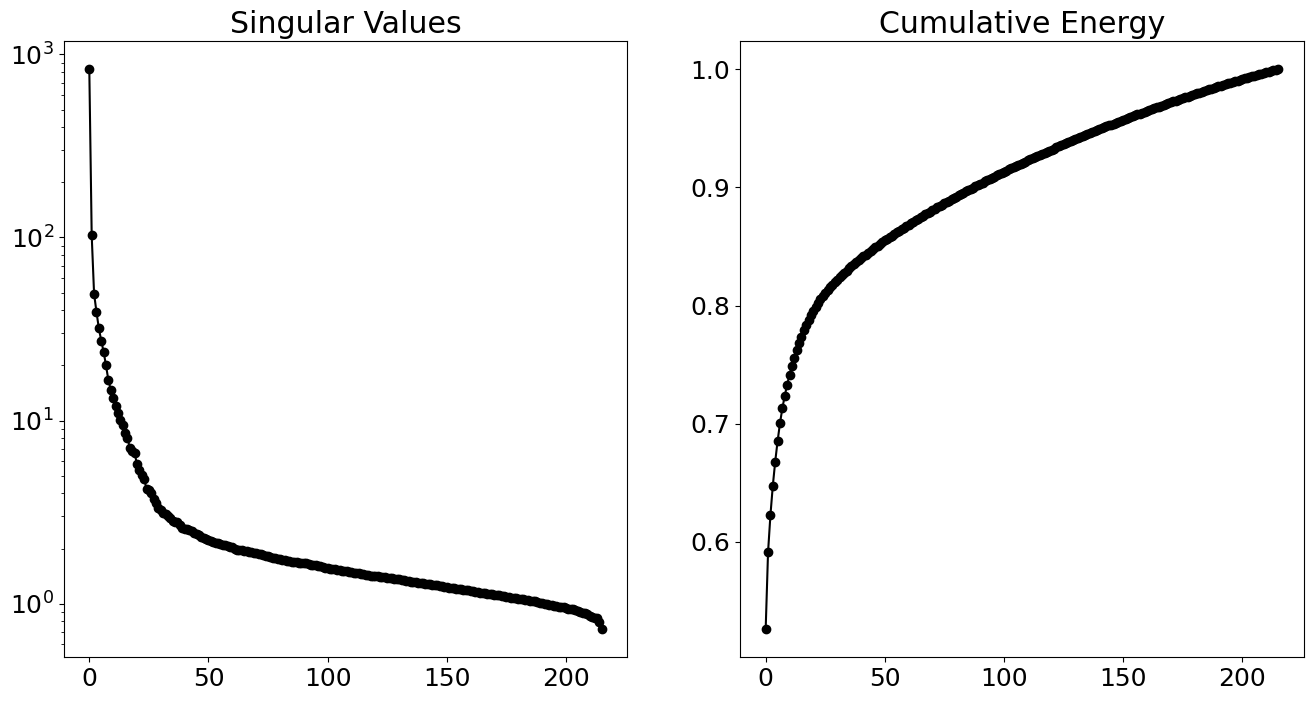

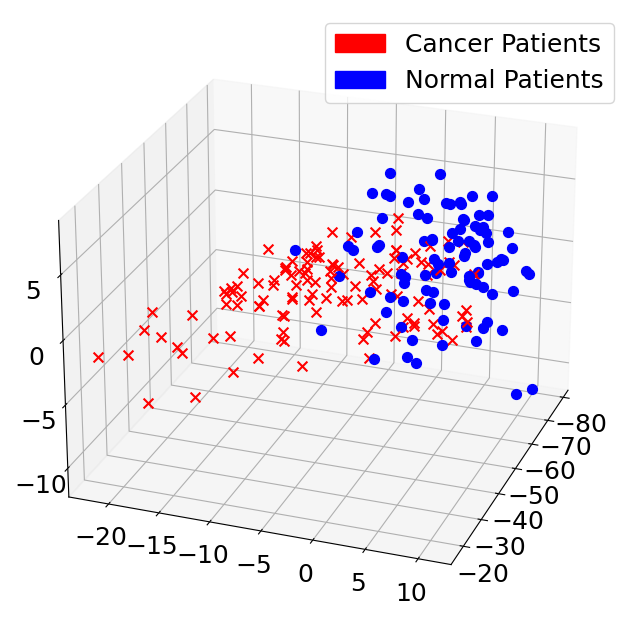

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Load Ovarian Cancer Dataset
obs = np.loadtxt('ovariancancer_obs.csv',delimiter=',')
print("Size of Matrix obs: " + str(obs.shape))

f = open('ovariancancer_grp.csv', "r")
grp = f.read().split("\n")
print("Size of Matrix grp: " + str(len(grp)))

# Compute SVD
U, S, VT = np.linalg.svd(obs,full_matrices=False)
print("Size of Matrix U: " + str(U.shape))
print("Size of Matrix S: " + str(S.shape))
print("Size of Matrix VT: " + str(VT.shape))

# Singular Values S
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax1.set_title("Singular Values")

# Plot Cumulative Sum
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
ax2.set_title("Cumulative Energy")
plt.show()

# Project on 3 Principal Component Axis
# First values can help capture a large portion of the variance

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
red_patch = mpatches.Patch(color='red', label='Cancer Patients')
blue_patch = mpatches.Patch(color='blue',label="Normal Patients")
ax.legend(handles=[red_patch,blue_patch])
plt.show()
